## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
dataset = pd.read_csv('D:/Vlad/Все ДЗ(2)/2/AI/Rep-AI/titanic.csv')

columns = dataset.columns.tolist()
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [ ]:
#code

male = dataset[dataset['Sex'] == 'male']
female = dataset[dataset['Sex'] == 'female']

survivalRateMale = (male['Survived'].mean() * 100).round(2)
survivalRateFemale = (female['Survived'].mean() * 100).round(2)

print('Male survival rate:', survivalRateMale)
print('Female survival rate:', survivalRateFemale)

Male survival rate: 18.89
Female survival rate: 74.2


**Задача 2:** Відтворіть ці графіки  
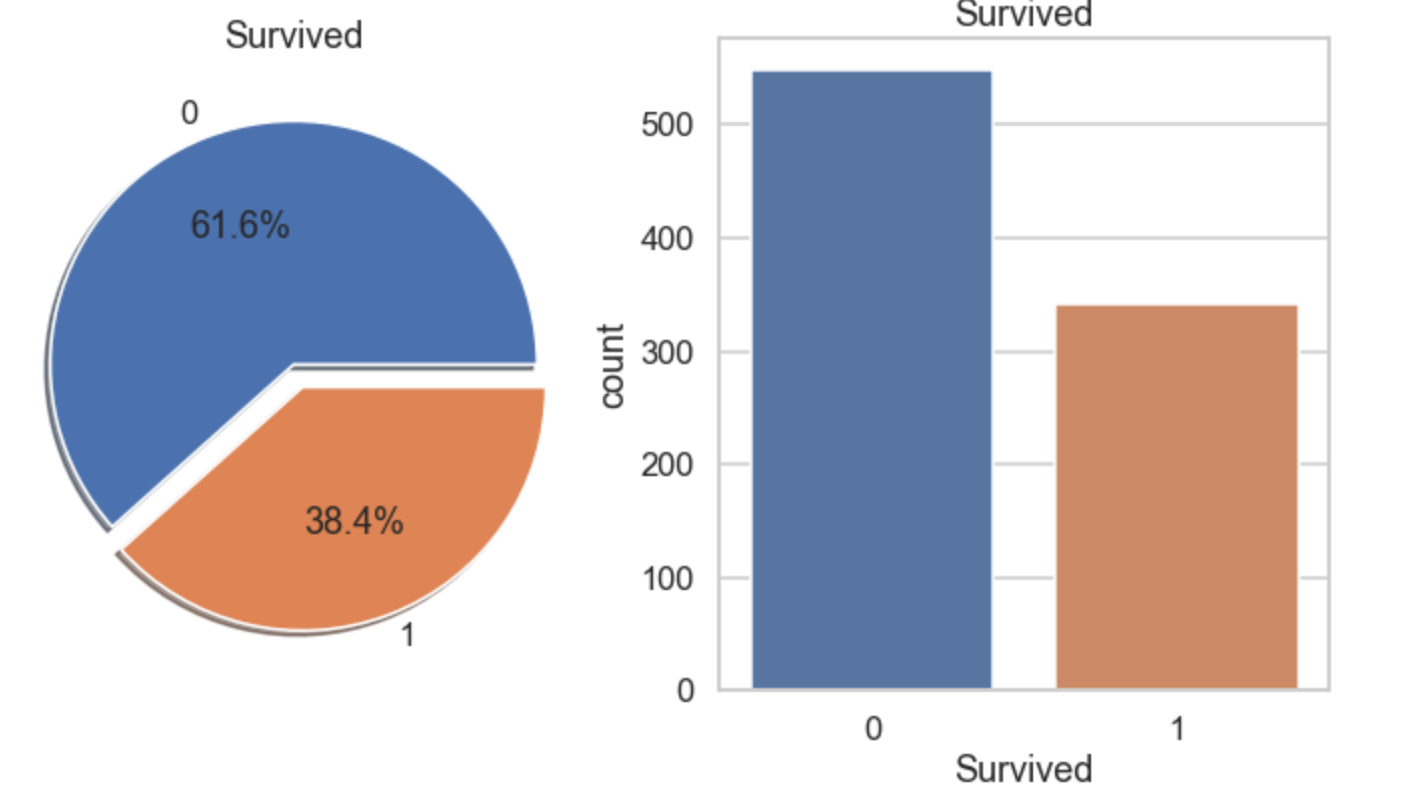


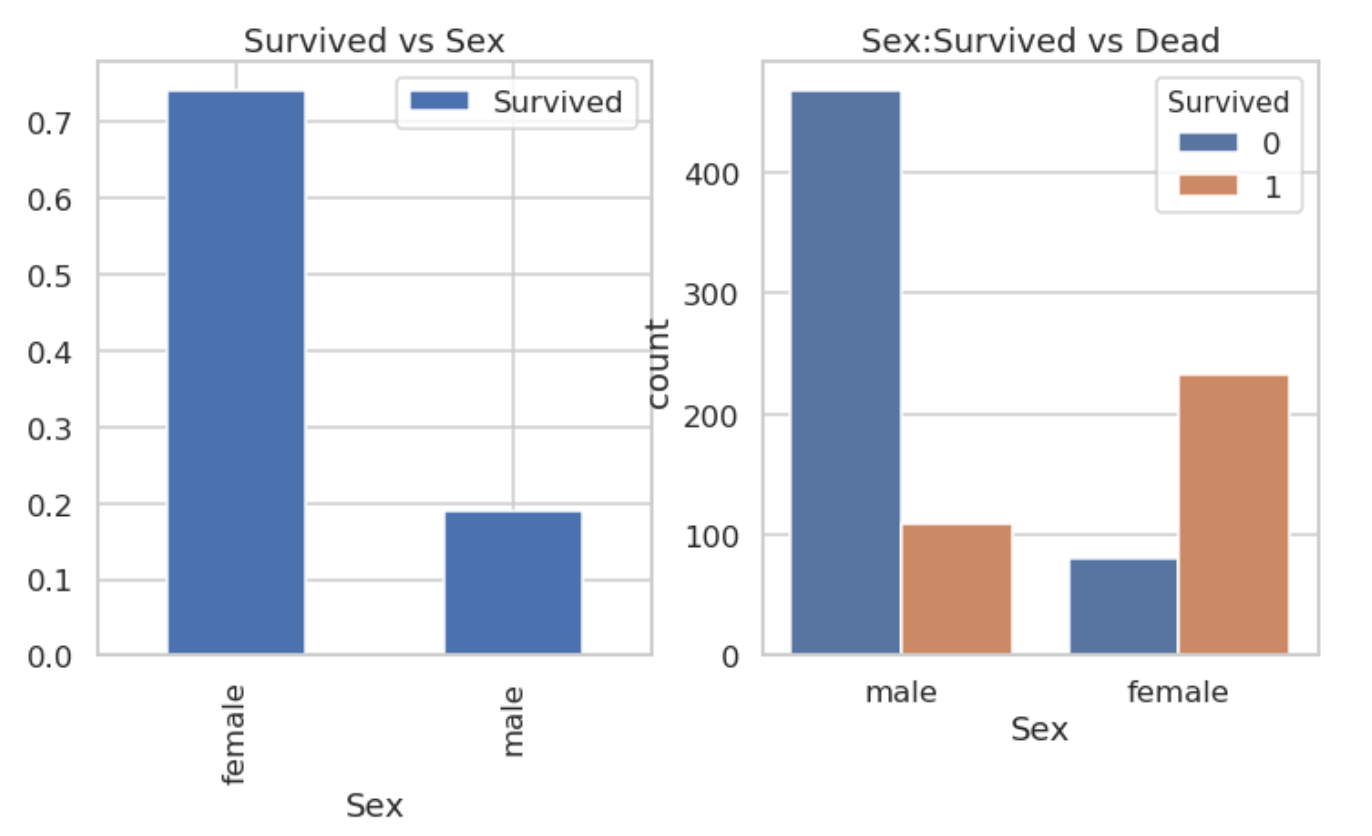

Графік 1


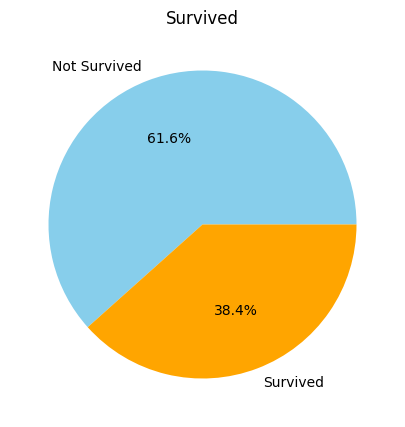

Графік 2


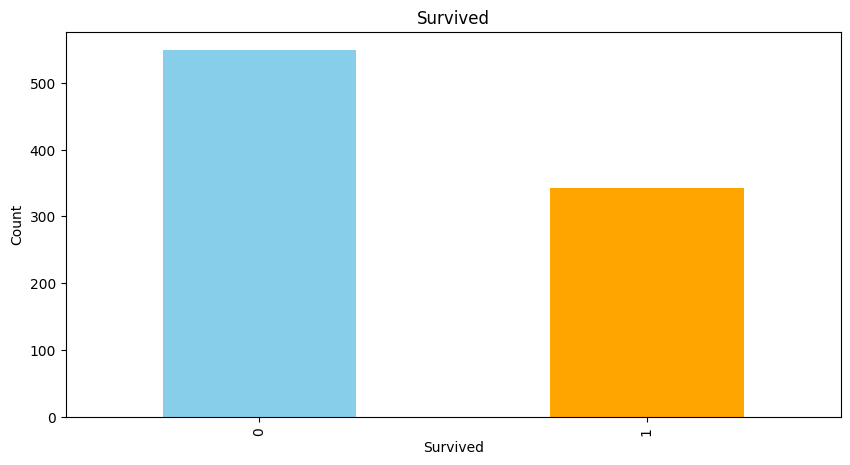

Графік 3


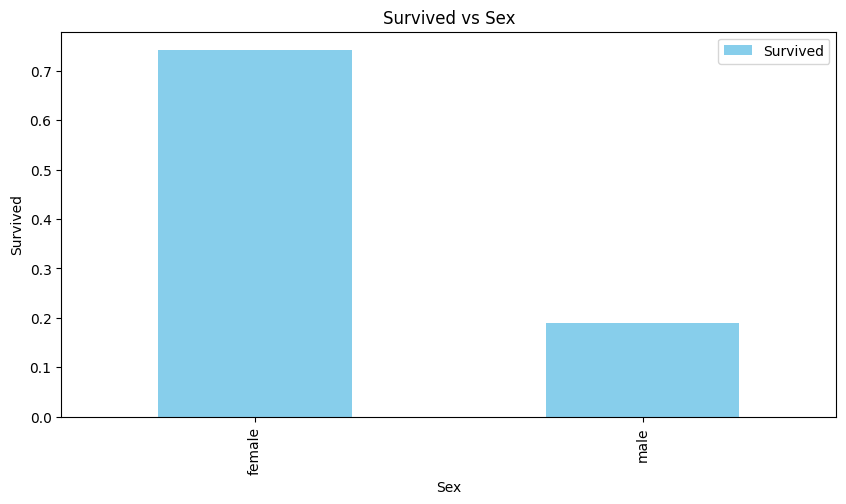

Графік 4


<Figure size 1000x500 with 0 Axes>

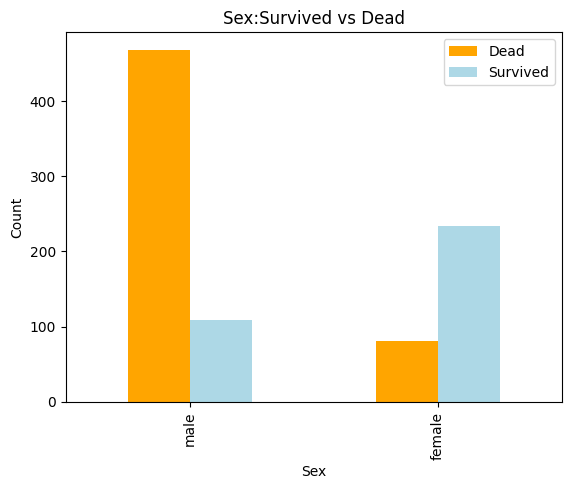

In [9]:
#code

print('Графік 1')
# відсоток виживших у вигляді кругової діаграми
plt.figure(figsize=(10, 5))
survivedCounts = dataset['Survived'].value_counts()
plt.pie(survivedCounts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Survived')
plt.show()

print('Графік 2')
# відсоток виживших у вигляді стовпчастої діаграми
plt.figure(figsize=(10, 5))
survivedCounts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

print('Графік 3')
# відсоток виживших у порівняні з чоловіками і жінками
plt.figure(figsize=(10, 5))
survivedBySex = dataset.groupby('Sex')['Survived'].mean()
survivedBySex.plot(kind='bar', color='skyblue')
plt.title('Survived vs Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.legend(['Survived'])
plt.show()

print('Графік 4')
# відсоток померлих і виживших у порівняні з чоловіками і жінками
plt.figure(figsize=(10, 5))
survivedBySex2 = dataset.groupby(['Sex', 'Survived']).size().unstack()
survivedBySex2 = survivedBySex2.reindex(['male', 'female'])
survivedBySex2.plot(kind='bar', stacked=False, color=['orange', 'lightblue'])
plt.title('Sex:Survived vs Dead')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Dead', 'Survived'], loc='upper right')
plt.show()

Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [ ]:
#code

dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [11]:
#code

def findName(name):
    if "Miss." in name:
        return name.split("Miss. ")[1].split()[0]
    elif "Mrs." in name:
        return name.split("(")[1].split()[0] if "(" in name else name.split("Mrs. ")[1].split()[0]
    elif "Mr." in name:
        return name.split("Mr. ")[1].split()[0]
    return None

dataset['deletedFemaleNames'] = dataset[dataset["Sex"] == "female"]["Name"].map(findName)
mostCommonFemaleName = dataset['deletedFemaleNames'].value_counts().idxmax()

print(mostCommonFemaleName)

Anna


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [70]:
#code

dataset['deletedMaleNames'] = dataset[dataset["Sex"] == "male"]["Name"].map(findName)
mostCommonMaleName = dataset['deletedMaleNames'].value_counts().idxmax()

print(mostCommonMaleName)

William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
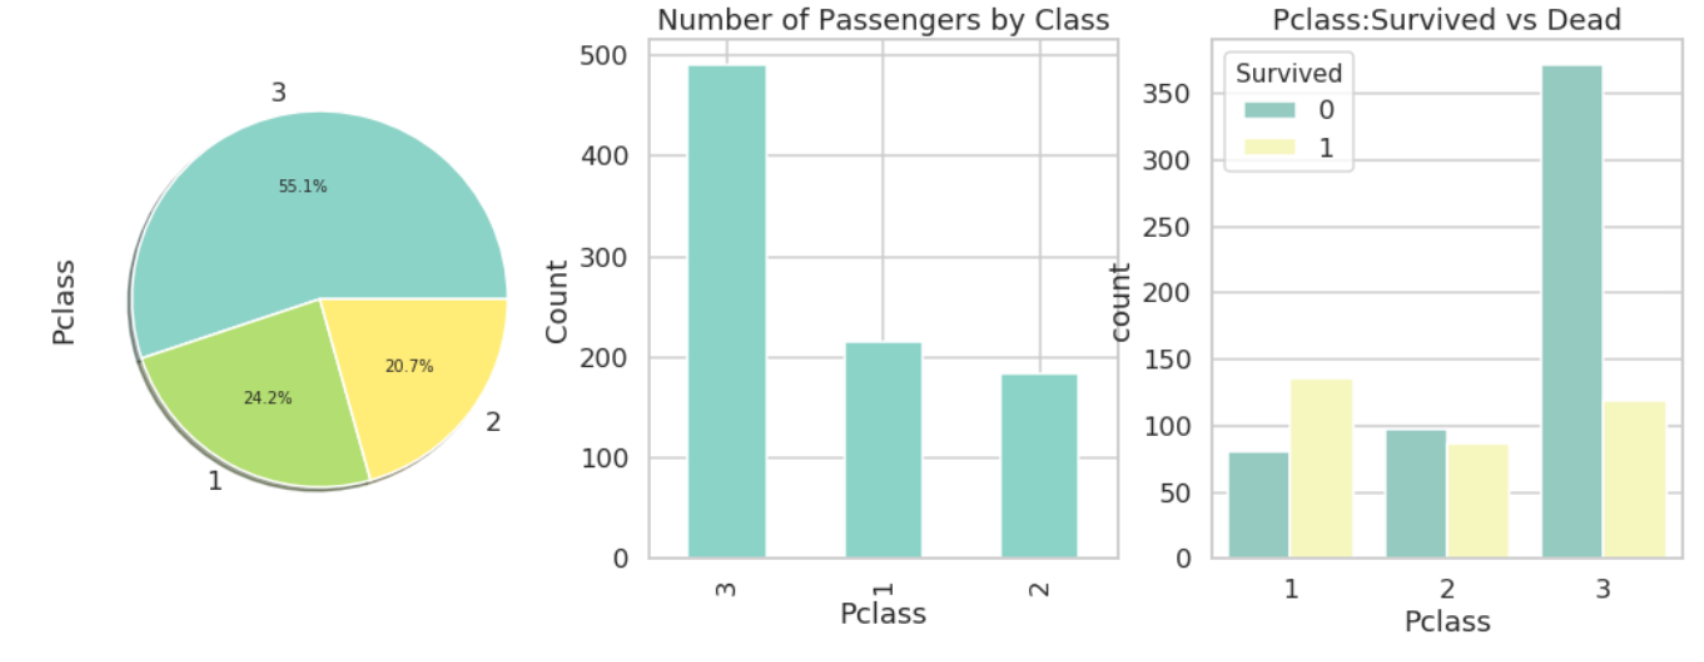

Діаграма 1


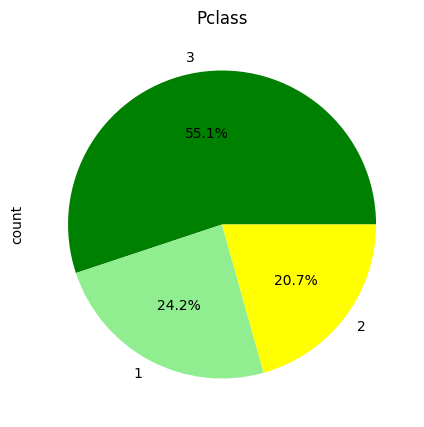

Діаграма 2


C:\Users\Admin\AppData\Local\Temp\ipykernel_18196\1714908896.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Pclass', data=dataset, order=[3, 1, 2], palette=['green','lightgreen','yellow'])


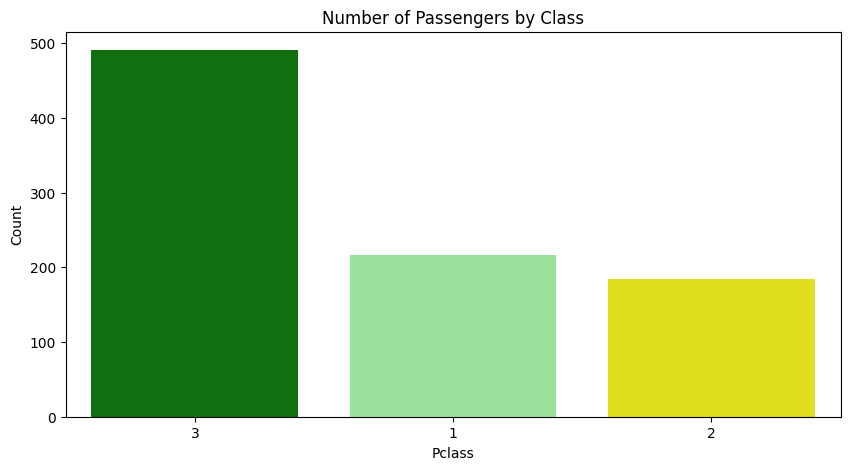

Діаграма 3


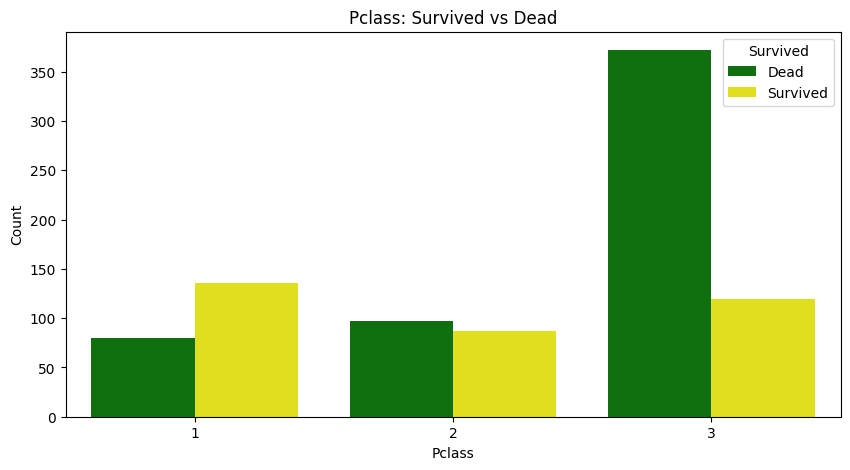

In [ ]:
#code

print('Діаграма 1')
# кругова діаграма показує скільки людей у кожному класі у відсотках
plt.figure(figsize=(10, 5))
dataset['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green','lightgreen','yellow'], labels=['3', '1', '2'])
plt.title('Pclass')
plt.show()

print('Діаграма 2')
# стовпчата діаграма показує скільки людей у кожному класі 
plt.figure(figsize=(10, 5))
sb.countplot(x='Pclass', data=dataset, order=[3, 1, 2], palette=['green','lightgreen','yellow'])
plt.title('Number of Passengers by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

print('Діаграма 3')
# діаграма яка показує скільки людей вижило і померло у кожному з класів
plt.figure(figsize=(10, 5))
sb.countplot(x='Pclass', hue='Survived', data=dataset, order=[1, 2, 3], palette=['green','yellow'])
plt.title('Pclass: Survived vs Dead')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Dead', 'Survived'])
plt.show()

Прокоментуйте побудовані графіки

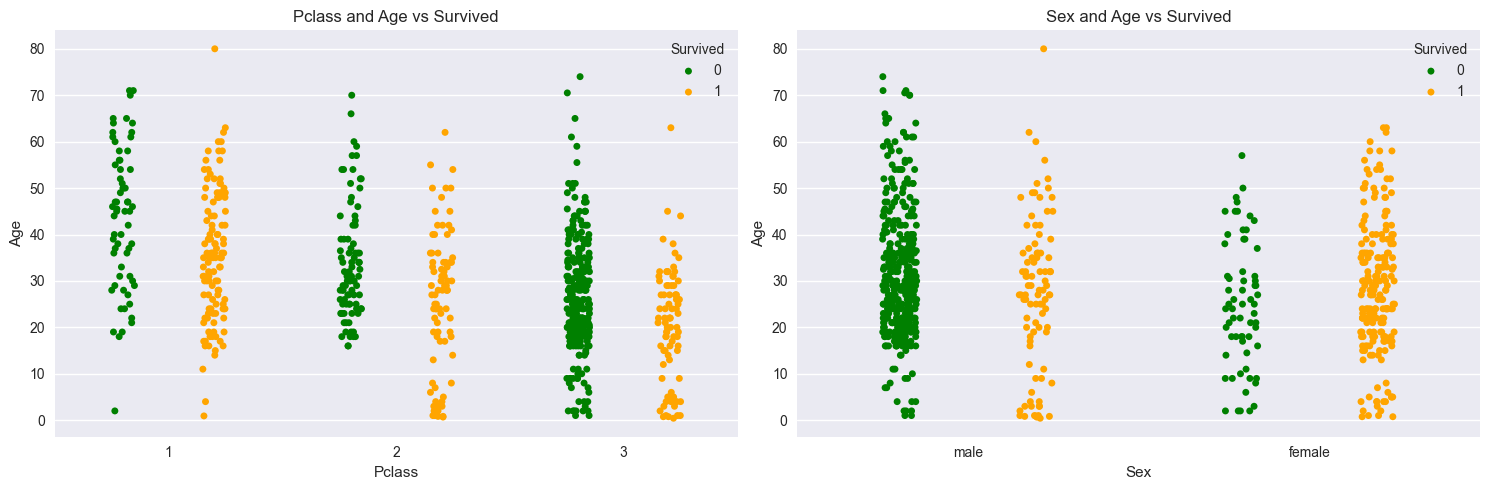

In [106]:
#code

plt.figure(figsize=(15, 5))

# графік показує кількість і якого віку пасажири певного класу загибли і вижили
plt.subplot(1, 2, 1)
sb.stripplot(x='Pclass', y='Age', hue='Survived', data=dataset, palette=['green', 'orange'], jitter=True, dodge=True)
plt.title('Pclass and Age vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['0', '1'])

# графік показує за статтю загиблих і виживших по віку
plt.subplot(1, 2, 2)
sb.stripplot(x='Sex', y='Age', hue='Survived', data=dataset, palette=['green', 'orange'], jitter=True, dodge=True)
plt.title('Sex and Age vs Survived')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['0', '1'])

plt.tight_layout()
plt.show()

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

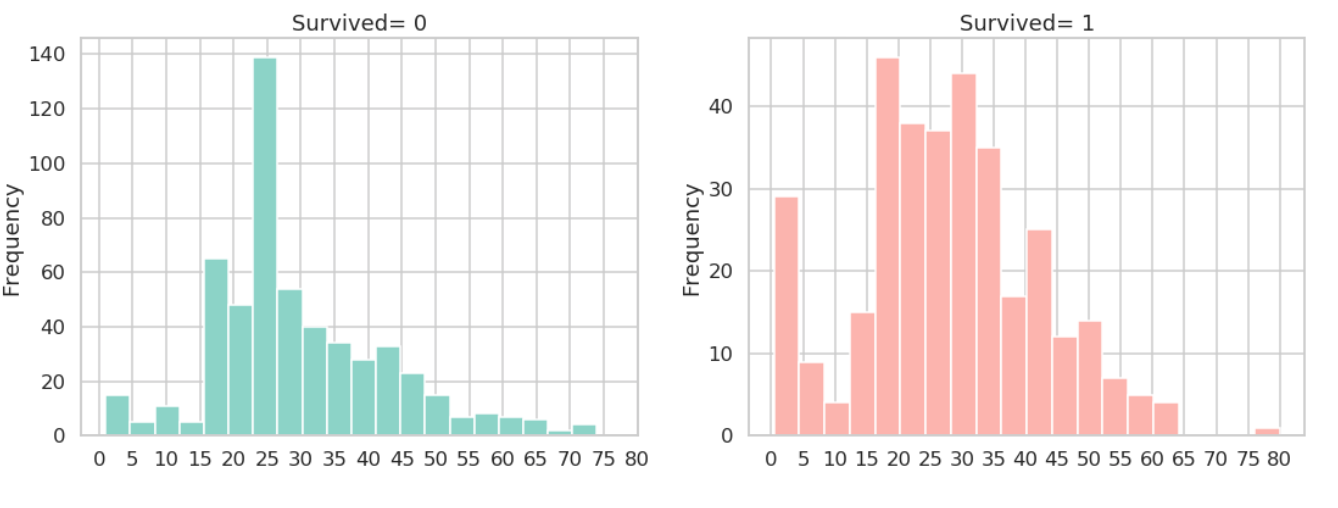



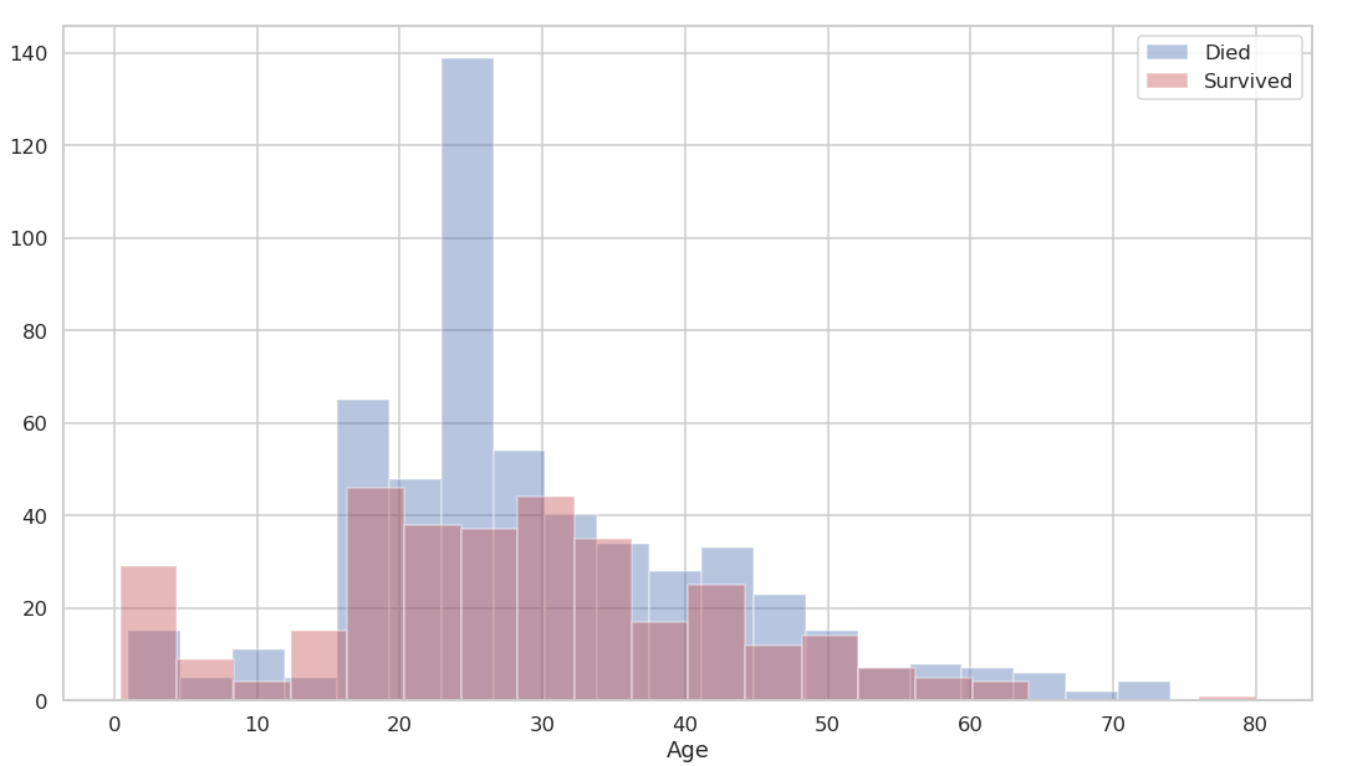

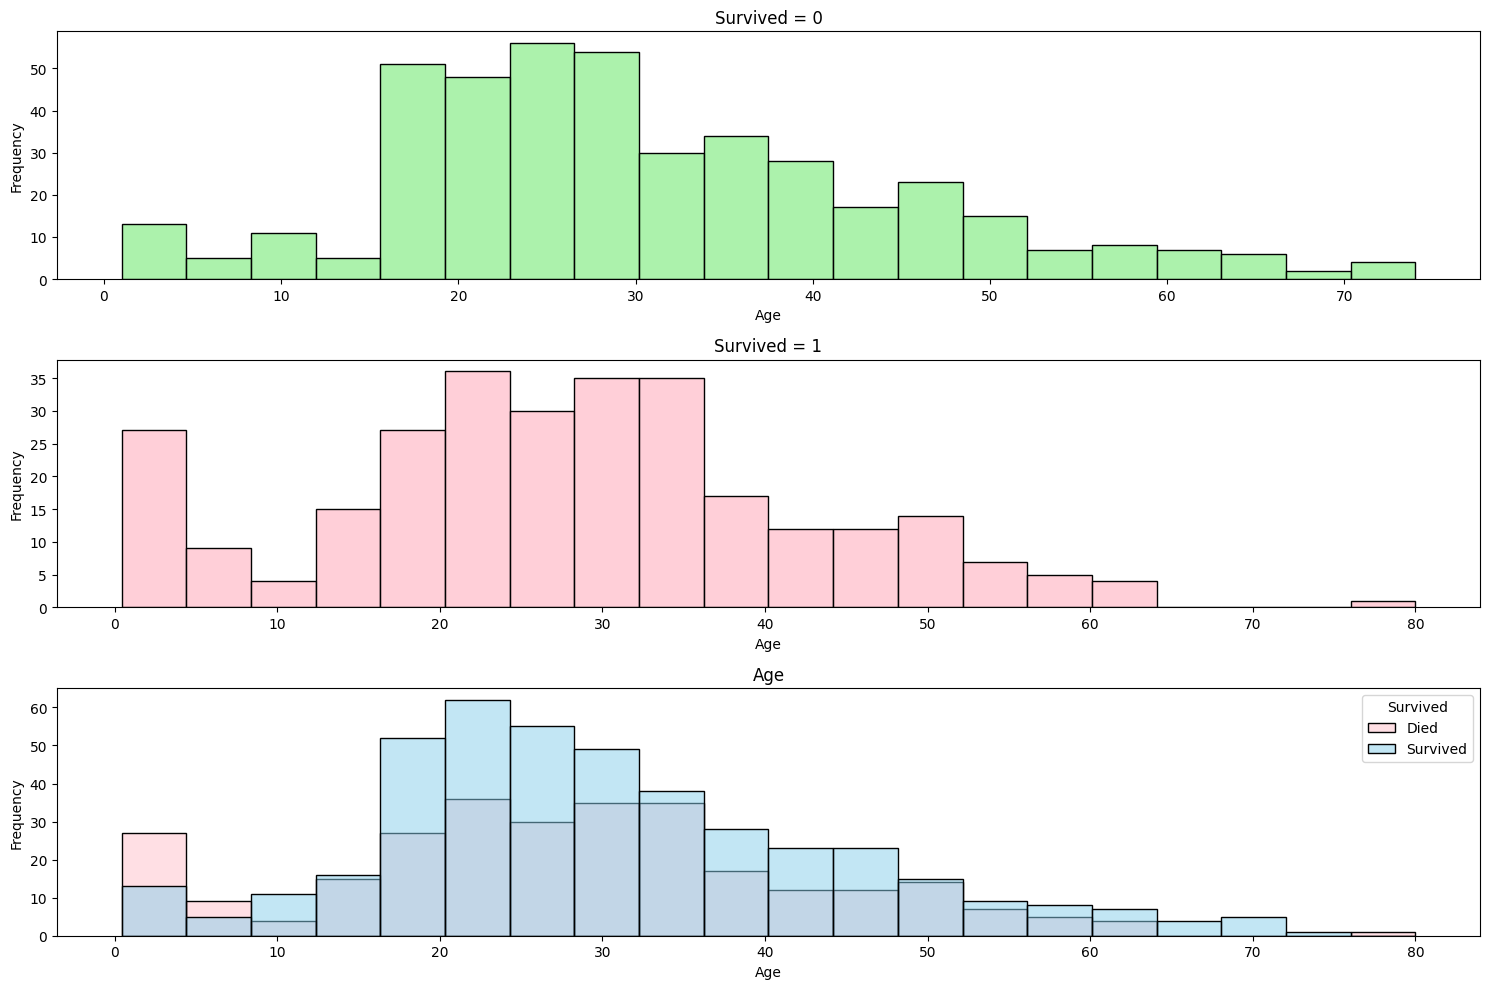

In [23]:
#code

plt.figure(figsize=(15, 10))

# перший графік
plt.subplot(3, 1, 1)
sb.histplot(data=dataset[dataset['Survived'] == 0], x='Age', bins=20, color='lightgreen')
plt.title('Survived = 0')
plt.xlabel('Age')
plt.ylabel('Frequency')

# другий графік
plt.subplot(3, 1, 2)
sb.histplot(data=dataset[dataset['Survived'] == 1], x='Age', bins=20, color='pink')
plt.title('Survived = 1')
plt.xlabel('Age')
plt.ylabel('Frequency')

# третій графік
plt.subplot(3, 1, 3)
sb.histplot(data=dataset, x='Age', hue='Survived', bins=20, palette=['skyblue', 'pink'])
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['Died', 'Survived'])

plt.tight_layout()
plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
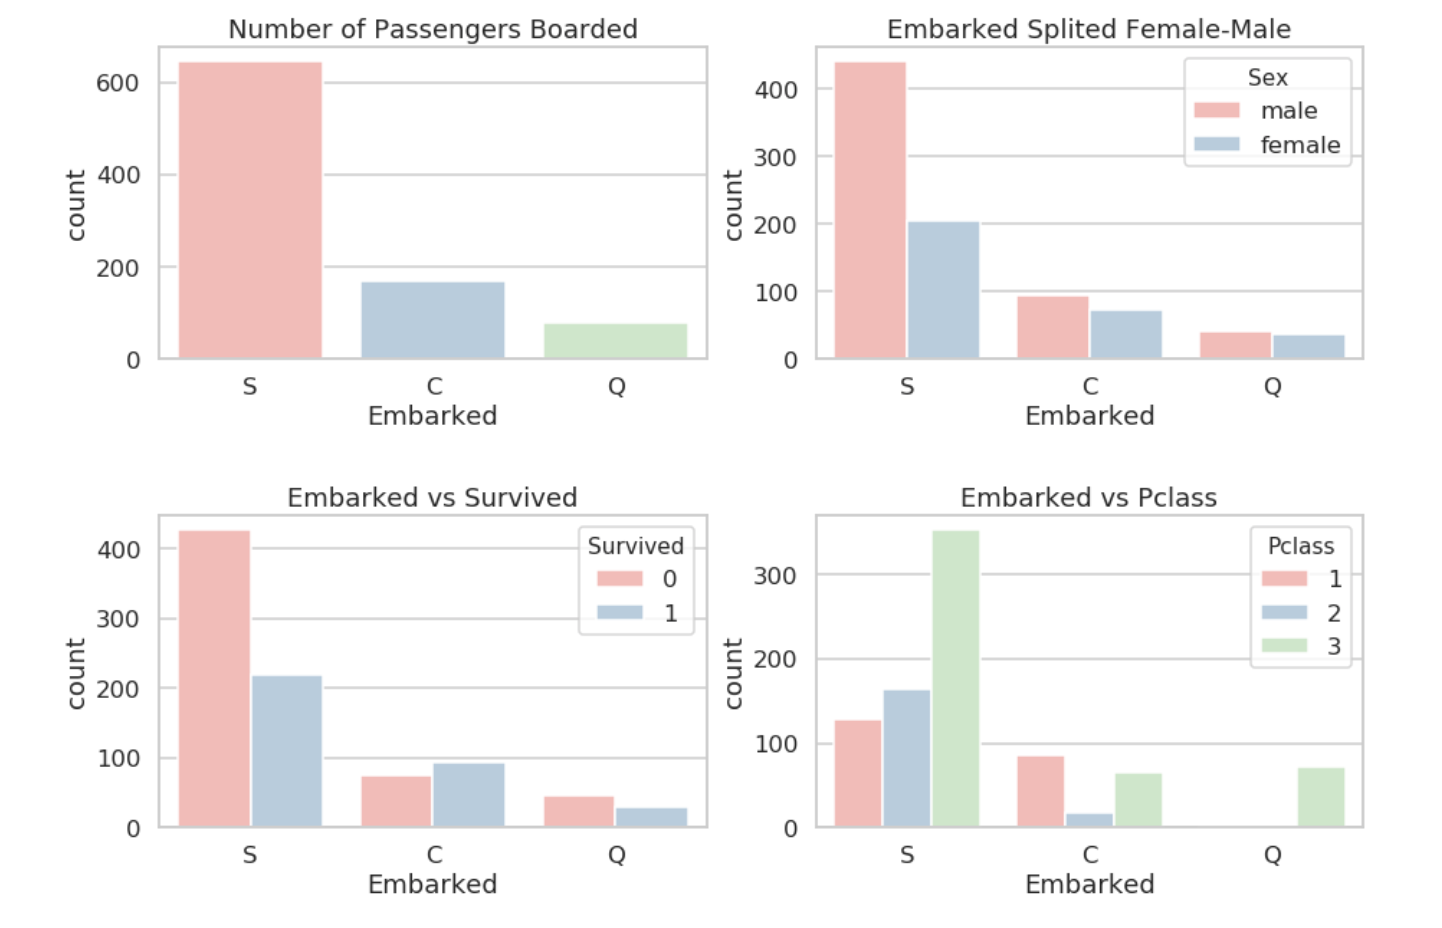

C:\Users\Admin\AppData\Local\Temp\ipykernel_11644\197824803.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Embarked', data=dataset, palette=['pink', 'skyblue', 'lightgreen'])


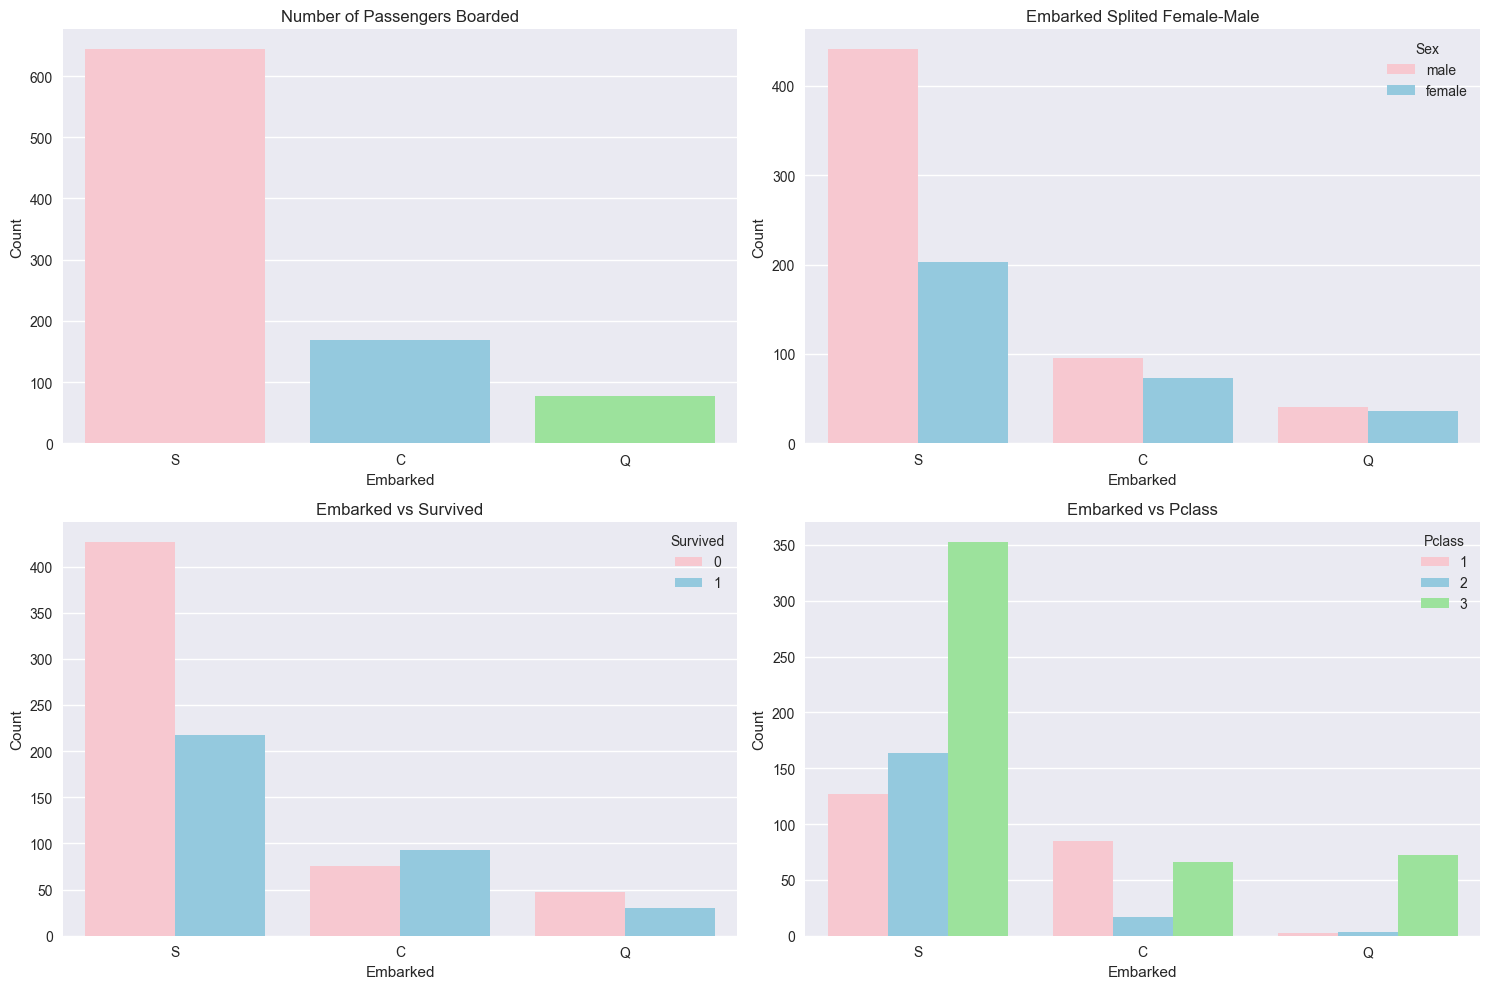

In [116]:
#code

plt.figure(figsize=(15, 10))

# перший графік
plt.subplot(2, 2, 1)
sb.countplot(x='Embarked', data=dataset, palette=['pink', 'skyblue', 'lightgreen'])
plt.title('Number of Passengers Boarded')
plt.xlabel('Embarked')
plt.ylabel('Count')

# другий графік
plt.subplot(2, 2, 2)
sb.countplot(x='Embarked', hue='Sex', data=dataset, palette=['pink', 'skyblue'])
plt.title('Embarked Splited Female-Male')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['male', 'female'])

# третій графік
plt.subplot(2, 2, 3)
sb.countplot(x='Embarked', hue='Survived', data=dataset, palette=['pink', 'skyblue'])
plt.title('Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['0', '1'])

# четвертий графік
plt.subplot(2, 2, 4)
sb.countplot(x='Embarked', hue='Pclass', data=dataset, palette=['pink', 'skyblue', 'lightgreen'])
plt.title('Embarked vs Pclass')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Pclass', labels=['1', '2', '3'])

plt.tight_layout()
plt.show()

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

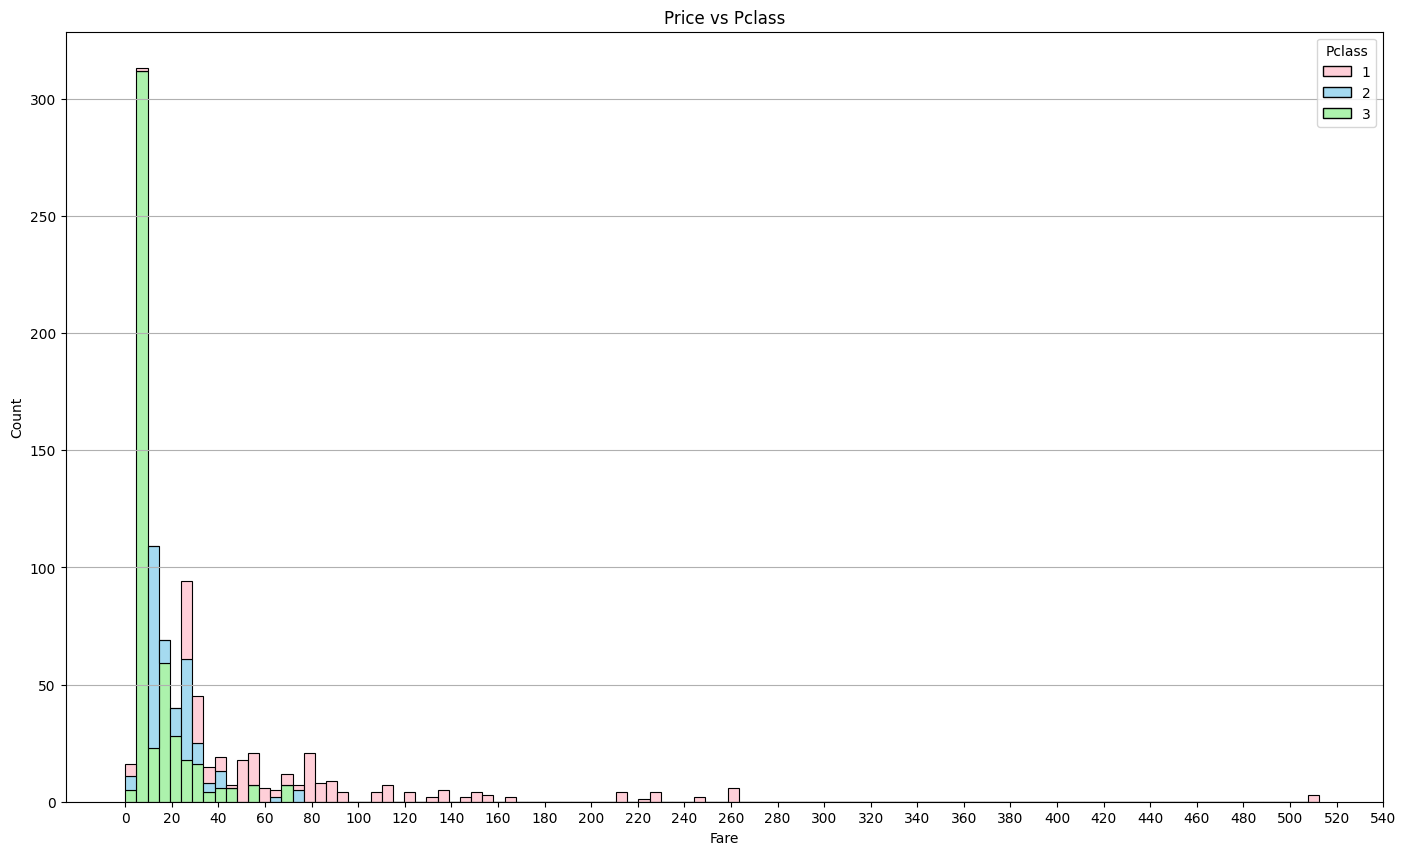

In [25]:
#code

plt.figure(figsize=(17, 10))

sb.histplot(data=dataset, x="Fare", hue="Pclass", palette=["pink", "skyblue", "lightgreen"], multiple="stack")

plt.title("Price vs Pclass")
plt.xticks(range(0, 550, 20))

plt.grid(axis="y")
plt.show()

Прокоментуйте побудовані графіки

Графіки показали що загиблих набагато більше чим виживших, серед виживших більше жінок, найпопулярніші імена це Anna і William, найбільше людей було у 3 класі і ніби пріорітет спасіння був нищим, найбільше квитків було розпродано від 0 до 20 фунтів третьому класу і найбільше людей було з порту S